### Assignment 1 - Model Interpretation
#### Anchal Garg (D20003)

## Model Interpretation - Exploring the Bias Variance Trade-off

### Objective:

Exploring the bias-variance trade-off.......

* **Part A: Overfitting in Linear Regression** .....

* **Part B: Overfitting in Decision Tree** .....

### A. Fitting a Linear Regression Line (Example)

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.max_columns',50)

In [62]:
data = pd.read_csv('C:\Praxis\Term-3\MI\Assignment_Dataset\wk3_kc_house_train_data.csv')
data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.5,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.0,1160,6000,1.0,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000


In [63]:
data = data.sort_values(['sqft_living','price'])

In [8]:
data.isnull().sum() #no null values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
#defined X and y for our model

X = data[['sqft_living']] #taking square feet living variable as x (independent variable) for regression line
y = data[['price']]  

In [10]:
linear = LinearRegression()

In [11]:
linear.fit(X,y)

LinearRegression()

In [12]:
print("Coefficient is:",linear.coef_)   #coefficient of regression line

Coefficient is: [[288.59846375]]


In [13]:
linear.intercept_  #intercept of regression line

array([-59493.31716521])

In [14]:
y_pred = linear.predict(X)  #predicting using linear model

In [15]:
y_pred

array([[  24200.23732129],
       [  47288.11442101],
       [  51328.49291347],
       ...,
       [2255066.36208215],
       [2794745.4892882 ],
       [3418118.17098076]])

### Here You Go ...

**A.1. Create a basic setup**

Write your own function called ‘polynomial_dataframe’ which accepts an array ‘feature’ and a maximal ‘degree’ and returns an data frame with the first column equal to ‘feature’ and the remaining columns equal to ‘feature’ to increasing integer powers up to ‘degree’.

In [16]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature

    poly_dataframe['power_1'] = feature
    
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            
            poly_dataframe[name] = feature.apply(lambda x: x**power)
            
            
    return poly_dataframe


#### A.2. Fitting a Polynomial of degree 2

Use your polynomial_dataframe() function to create a dataframe with feature = 'sqft_living' and degree = 2. Take your y as 'price' and X as polynomial_dataframe(sales['sqft_living'], 1) and fit the regression model y on X. Plot the model on the scatter plot between 'sqft_living' and 'price'.

In [20]:
poly_2 = polynomial_dataframe(data['sqft_living'],2)
poly_2['price'] = data['price']

In [21]:
X = poly_2.drop(['price'], axis = 1)
y = poly_2[['price']]

In [22]:
#building regression model
linear = LinearRegression()

In [23]:
#fitting our model, using x and y
linear.fit(X,y)

LinearRegression()

In [28]:
print("Coefficients are:",linear.coef_)  #printing coef of model

Coefficients are: [[1.22673842 0.0522949 ]]


In [26]:
y_pred = linear.predict(X) #predicting using model

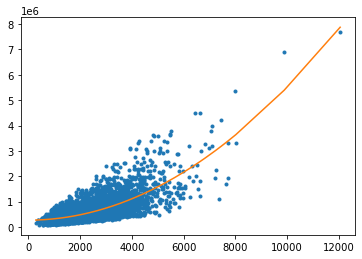

In [27]:
#plotting model on scatter plot
plt.plot(poly_2['power_1'],y,'.',
        poly_2['power_1'], y_pred,'-')

#### A.3. Fitting higher order polynomial fits

Fit a polynomial of 3rd degree, 4th degree and 5th degree. Look at the fitted line. Do they appear as you would expect?

#### Fitting a polynomial of 3rd degree

In [29]:
poly_3 = polynomial_dataframe(data['sqft_living'], 3)
poly_3['price'] = data['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
X_3 = poly_3.drop(['price'], axis = 1)
y_3 = poly_3[['price']]


linear.fit(X_3, y_3) #fitting the model
print("Coefficients are:",linear.coef_)  #printing coefficients of model

#predicting
y_3_pred = linear.predict(X_3)


Coefficients are: [[7.50292074e+00 5.03063603e-02 1.67090667e-07]]


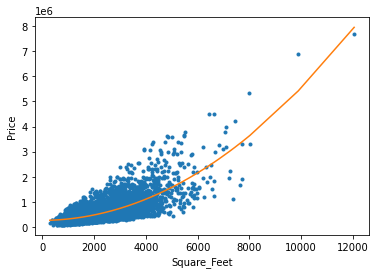

In [31]:
#Plotting model on scatter plot
plt.plot(poly_3['power_1'],y_3,'.',
        poly_3['power_1'], y_3_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

#### Fitting a polynomial of 4th degree

In [32]:
poly_4 = polynomial_dataframe(data['sqft_living'], 4)
poly_4['price'] = data['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
X_4 = poly_4.drop(['price'], axis = 1)
y_4 = poly_4[['price']]


linear.fit(X_4, y_4) #fitting the model
print("Coefficients are:",linear.coef_)  #printing coefficients of model

#predicting
y_4_pred = linear.predict(X_4)

Coefficients are: [[-1.53852721e+01  6.08970906e-02 -1.61496571e-06  9.11725302e-11]]


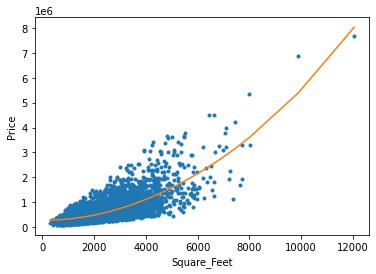

In [33]:
#Plotting model on scatter plot
plt.plot(poly_4['power_1'],y_4,'.',
        poly_4['power_1'], y_4_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

#### Fitting a polynomial of 5th degree

In [34]:
poly_5 = polynomial_dataframe(data['sqft_living'], 5)
poly_5['price'] = data['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
X_5 = poly_5.drop(['price'], axis = 1)
y_5 = poly_5[['price']]


linear.fit(X_5, y_5) #fitting the model
print("Coefficients are:",linear.coef_)  #printing coefficients of model

#predicting
y_5_pred = linear.predict(X_5)

Coefficients are: [[ 3.19801946e-05  5.44553066e-02 -6.43007280e-07  4.83000202e-11
  -2.30362232e-16]]


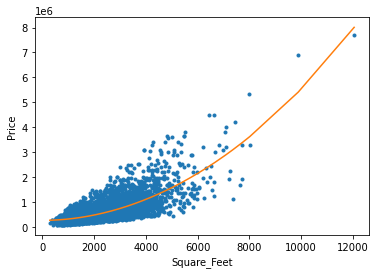

In [35]:
#Plotting model on scatter plot
plt.plot(poly_5['power_1'],y_5,'.',
        poly_5['power_1'], y_5_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

#### A.4. Fit a polynomial of degree 15

Now try a 15th degree polynomial. Print out the coefficients and look at the resulted fitted line. Do you think this degree is appropriate for these data? If we were to use a different subset of the data do you think we would get pretty much the same curve?

In [36]:
poly_15 = polynomial_dataframe(data['sqft_living'], 15)
poly_15['price'] = data['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
X_15 = poly_15.drop(['price'], axis = 1)
y_15 = poly_15[['price']]


linear.fit(X_15, y_15) #fitting the model
print("Coefficients are:",linear.coef_)  #printing coefficients of model

#predicting
y_15_pred = linear.predict(X_15)

Coefficients are: [[ 3.65649652e-89 -3.49017019e-49 -4.97899062e-55 -1.99136489e-59
   3.04293598e-73  8.36182560e-70  5.73133489e-66  3.83786524e-62
   2.47884969e-58  1.51269750e-54  8.40594099e-51  3.93663091e-47
   1.24240972e-43 -2.25041880e-47  1.01236550e-51]]


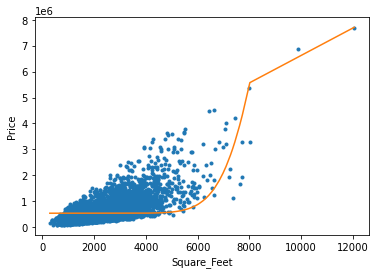

In [37]:
#Plotting model on scatter plot
plt.plot(poly_15['power_1'],y_15,'.',
        poly_15['power_1'], y_15_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

No, 15 degree is not appropriate for this polynomial model. As we can see our data is overfitting.

#### A.5. Exploring overfitting due to high variance

Estimate a 15th degree polynomial on all 4 subsets of the original sample (provided to you), plot the results and view the coefficients for all four models.

In [38]:
#calling the subset data

set1 = pd.read_csv('C:\Praxis\Term-3\MI\Assignment_Dataset\wk3_kc_house_set_1_data.csv')
set2 = pd.read_csv('C:\Praxis\Term-3\MI\Assignment_Dataset\wk3_kc_house_set_2_data.csv')
set3 = pd.read_csv('C:\Praxis\Term-3\MI\Assignment_Dataset\wk3_kc_house_set_3_data.csv')
set4 = pd.read_csv('C:\Praxis\Term-3\MI\Assignment_Dataset\wk3_kc_house_set_4_data.csv')

#### Using set 1 of subset, for polynomial fit of degree 15 and for fitting the model of degree 15

In [39]:
subset1 = polynomial_dataframe(set1['sqft_living'], 15)
subset1['price'] = set1['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
target1 = subset1.drop(['price'], axis = 1)
y1 = subset1[['price']]

#fitting model
linear.fit(target1, y1)
print("Coefficients are:", linear.coef_)  #printing coefficients of model

#predicting 
y1_pred = linear.predict(target1)

Coefficients are: [[ 3.05794168e-90 -1.69394919e-49  2.35913867e-55 -9.95682444e-60
   3.23082736e-74  1.10358333e-70  8.37724029e-67  6.23411957e-63
   4.49156442e-59  3.06938763e-55  1.91749300e-51  1.01335180e-47
   3.62176959e-44 -5.63501661e-48  2.18641116e-52]]


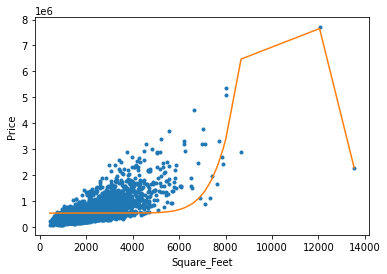

In [40]:
#plotting model on scatter plot
plt.plot(subset1['power_1'],y1,'.',
        subset1['power_1'], y1_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

#### Using set 2 of subset, for polynomial fit of degree 15 and for fitting the model of degree 15

In [41]:
subset2 = polynomial_dataframe(set2['sqft_living'], 15)
subset2['price'] = set2['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
target2 = subset2.drop(['price'], axis = 1)
y2 = subset2[['price']]

#fitting model
linear.fit(target2, y2)
print("Coefficients are:", linear.coef_)  #printing coefficients of model

#predicting
y2_pred = linear.predict(target2)

Coefficients are: [[ 2.71335949e-77  7.33540841e-39 -1.85007963e-44  9.58625903e-50
   5.73786181e-71  1.51934988e-58  3.64549617e-55  1.50416258e-51
   5.76015667e-48  1.95770498e-44  5.39396541e-41  9.40376364e-38
  -3.63529143e-41  4.65476526e-45 -1.97198908e-49]]


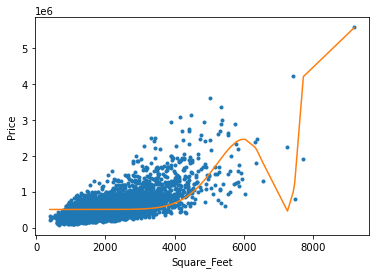

In [42]:
#plotting model on scatter plot
plt.plot(subset2['power_1'],y2,'.',
        subset2['power_1'], y2_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

#### Using set 3 of subset, for polynomial fit of degree 15 and for fitting the model of degree 15

In [43]:
subset3 = polynomial_dataframe(set3['sqft_living'], 15)
subset3['price'] = set3['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
target3 = subset3.drop(['price'], axis = 1)
y3 = subset3[['price']]

#fitting model
linear.fit(target3, y3)
print("Coefficients are:", linear.coef_)  #printing coefficients of model

#predicting
y3_pred = linear.predict(target3)

Coefficients are: [[ 2.83751934e-88  5.40215608e-49 -1.63142539e-55  3.98272978e-59
   1.57170169e-72  4.27894908e-69  2.68009626e-65  1.63911362e-61
   9.66435015e-58  5.38044653e-54  2.72563636e-50  1.16253248e-46
   3.33756141e-43 -6.76238818e-47  3.43132932e-51]]


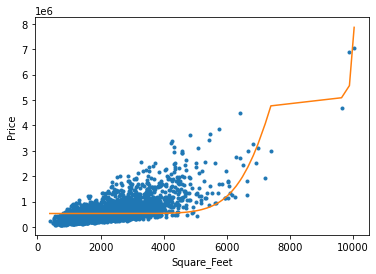

In [44]:
#plotting model on scatter plot
plt.plot(subset3['power_1'],y3,'.',
        subset3['power_1'], y3_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

#### Using set 4 of subset, for polynomial fit of degree 15 and for fitting the model of degree 15

In [45]:
subset4 = polynomial_dataframe(set4['sqft_living'], 15)
subset4['price'] = set4['price'] # adding price to the data. as it is our target variable

#defining dependent (y) and independent (x) variables
target4 = subset4.drop(['price'], axis = 1)
y4 = subset4[['price']]

#fitting model
linear.fit(target4, y4)
print("Coefficients are:", linear.coef_)  #printing coefficients of model

#predicting
y4_pred = linear.predict(target4)

Coefficients are: [[ 1.37116050e-76  2.79678301e-40 -2.13061788e-44 -5.68534423e-49
   2.58420327e-70  5.29002498e-58  1.27070046e-54  4.87868972e-51
   1.73549022e-47  5.47058320e-44  1.39587599e-40  2.25041871e-37
  -9.43954119e-41  1.31573060e-44 -6.09163447e-49]]


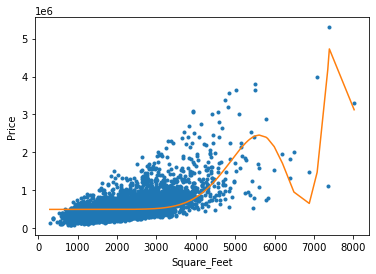

In [46]:
#plotting model on scatter plot
plt.plot(subset4['power_1'],y4,'.',
        subset4['power_1'], y4_pred,'-')
plt.xlabel('Square_Feet')
plt.ylabel('Price')
plt.show()

**Answer the following questions**

**Is the sign (positive or negative) for power_15 the same in all four models?**

No

**True/False the plotted fitted lines look the same in all four plots**

False, plotted lines don't look same in all four plots.

#### A.6. Validate your models

A separate training set, validation set and test set is provided to you. For each degree (1,2,...15), fit a regression model on the training set and validate on the validation set by computing the RSS. Save the RSS in a list and plot a graph to visualize 'RSS' against 'Model Complexity'. 

In [ ]:
#importing train, test, validation dataset

In [50]:
train_df = pd.read_csv('C:\Praxis\Term-3\MI\Assignment_Dataset\wk3_kc_house_train_data.csv')
train_df = train_df.sort_values(['sqft_living','price'])
train_df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8840,3980300371,20140926T000000,142000.0,0,0.00,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850
6982,2856101479,20140701T000000,276000.0,1,0.75,370,1801,1.0,0,0,5,5,370,0,1923,0,98117,47.6778,-122.389,1340,5000


In [51]:
test_df = pd.read_csv('C:\Praxis\Term-3\MI\Assignment_Dataset\wk3_kc_house_test_data.csv')
test_df = test_df.sort_values(['sqft_living','price'])
test_df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1462,7549801385,20140612T000000,280000.0,1,0.75,420,6720,1.0,0,0,3,5,420,0,1922,0,98108,47.5520,-122.311,1420,6720
1172,6453300055,20141007T000000,188000.0,1,1.00,550,16345,1.0,0,0,3,4,550,0,1945,0,98106,47.5181,-122.339,1100,9240


In [53]:
valid_df = pd.read_csv('C:\Praxis\Term-3\MI\Assignment_Dataset\wk3_kc_house_valid_data.csv')
valid_df = valid_df.sort_values(['sqft_living','price'])
valid_df.head(2)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
381,1723049033,20140620T000000,245000.0,1,0.75,380,15000,1.0,0,0,3,5,380,0,1963,0,98168,47.4810,-122.323,1170,15000
3804,6303400395,20150130T000000,325000.0,1,0.75,410,8636,1.0,0,0,2,4,410,0,1953,0,98146,47.5077,-122.357,1190,8636


In [114]:
for i in range(1,16):
    poly_data = polynomial_dataframe(train_df['sqft_living'], i)
    poly_data['price'] = train_df['price'] # add price to the data since it's the target
    
    X_train = poly_data.drop(['price'], axis = 1)
    y_train = poly_data[['price']]
    
    linear = LinearRegression(copy_X = True, fit_intercept= True, n_jobs=1, normalize=False )
    model = linear.fit(X_train, y_train)
    
    validation_data = polynomial_dataframe(valid_df['sqft_living'], i)
    validation_data['price'] = valid_df['price']
    
    X_valid = validation_data.drop(['price'], axis =1)
    y_valid = validation_data[['price']]
    
    predictions = linear.predict(X_valid)
    
    RSS = ((predictions - y_valid) * (predictions - y_valid)).sum()
    print("Degree: %s, Train Data RSS: $%.6f" % (i, RSS))

Degree: 1, Train Data RSS: $629097886299585.750000
Degree: 2, Train Data RSS: $623955062706517.750000
Degree: 3, Train Data RSS: $625820280251530.875000
Degree: 4, Train Data RSS: $629987341468497.125000
Degree: 5, Train Data RSS: $628238344095599.375000
Degree: 6, Train Data RSS: $566268581211901.125000
Degree: 7, Train Data RSS: $1073845840089625.625000
Degree: 8, Train Data RSS: $7087885537488250.000000
Degree: 9, Train Data RSS: $45305704688463568.000000
Degree: 10, Train Data RSS: $247342491440303392.000000
Degree: 11, Train Data RSS: $1193822763045106432.000000
Degree: 12, Train Data RSS: $5208198592702964736.000000
Degree: 13, Train Data RSS: $761623002128042496.000000
Degree: 14, Train Data RSS: $2297560925012636160.000000
Degree: 15, Train Data RSS: $6955038097254376448.000000


In [65]:
poly_data.head()

,power_1,power_2,power_3,power_4,power_5,power_6,power_7,power_8,power_9,power_10,power_11,power_12,power_13,power_14,power_15,price
8840,290,84100,24389000,7072810000,2051114900000,594823321000000,172498763090000000,50024641296100000000,14507145975869000000000,4207072333002010000000000,1220050976570582900000000000,353814783205469041000000000000,102606287129586021890000000000000,29755823267579946348100000000000000,8629188747598184440949000000000000000,142000.0
6982,370,136900,50653000,18741610000,6934395700000,2565726409000000,949318771330000000,351247945392100000000,129961739795077000000000,48085843724178490000000000,17791762177946041300000000000,6582952005840035281000000000000,2435692242160813053970000000000000,901206129599500829968900000000000000,333446267951815307088493000000000000000,276000.0
8338,384,147456,56623104,21743271936,8349416423424,3206175906594816,1231171548132409344,472769874482845188096,181543631801412552228864,69712754611742420055883776,26769697770909089301459369984,10279563944029090291760398073856,3947352554507170672035992860360704,1515783380930753538061821258378510336,582060818277409358615739363217347969024,265000.0
2228,390,152100,59319000,23134410000,9022419900000,3518743761000000,1372310066790000000,535200926048100000000,208728361158759000000000,81404060851916010000000000,31747583732247243900000000000,12381557655576425121000000000000,4828807485674805797190000000000000,1883234919413174260904100000000000000,734461618571137961752599000000000000000,228000.0
9631,390,152100,59319000,23134410000,9022419900000,3518743761000000,1372310066790000000,535200926048100000000,208728361158759000000000,81404060851916010000000000,31747583732247243900000000000,12381557655576425121000000000000,4828807485674805797190000000000000,1883234919413174260904100000000000000,734461618571137961752599000000000000000,245000.0


**Answer the following questions**

**Which degree (1, 2, …, 15) had the lowest RSS on Validation data?**

degree 7 had the lowest RSS on validation dataset which is $ 1073845840089625.625000

#### A.7. Test your Final Model

Now that you have selected a degree compute the RSS on TEST data for the model with the best degree from the Validation data.

In [115]:
train_data = polynomial_dataframe(train_df['sqft_living'], 7)
train_data['price'] = train_df['price'] # add price to the data since it's the target

#defining X and y for train set
X_train = train_data.drop(['price'], axis = 1) 
y_train = train_data[['price']]

#building and training our model for polynomial degree 7
linear = LinearRegression(copy_X = True, fit_intercept= True, n_jobs=1, normalize=False )
model = linear.fit(X_train, y_train)

test_data = polynomial_dataframe(test_df['sqft_living'], 7)
test_data['price'] = test_df['price'] # add price to the data since it's the target

#Defining X and y test set
X_test = test_data.drop(['price'], axis =1)
y_test = test_data[['price']]

# First get the predictions
y_pred = model.predict(X_test)

# then we will compute the residuals (since we are squaring it doesn't matter which order we subtract)
residuals = y_test - y_pred

# square the residuals and add them up
residuals_squared = residuals * residuals
RSS = residuals_squared.sum()
print("Degree: %s, Test Data RSS: $%.6f" % (7, RSS))

Degree: 7, Test Data RSS: $133047309814371.046875


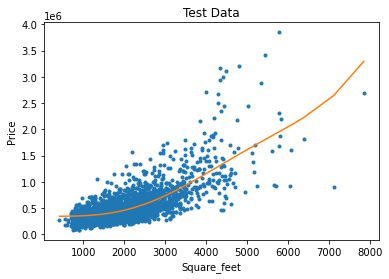

In [117]:
# Scatter plot of test data
plt.plot(test_data[['power_1']], y_test,'.',
         test_data[['power_1']],y_pred,'-')
plt.xlabel('Square_feet')
plt.ylabel('Price')
plt.title('Test Data')
plt.show()

**what is the RSS on TEST data for the model with the degree selected from Validation data? (Make sure you got the correct degree from the previous question)**

Degree: 7, Test Data RSS: $133047309814371.046875

### B. Fitting a Regression Tree (Example)

In [68]:
#importing required libraries
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
from sklearn.metrics import r2_score

#### B.1. Fit a Decision Tree with 1 node

Consider the variables ["bedroom", "bathroom", "sqft_living", "floors", "grade"] as predictors and fit a decision tree model to predict the 'price'. Note that this is a model with low bias and high variance

In [70]:
X = data[["bedrooms", "bathrooms", "sqft_living", "floors", "grade"]]
y = data[['price']]

In [71]:
#defining our model, keeping max_depth = 1 for node 1 decision tree
tree = DecisionTreeRegressor(max_depth = 1, random_state = 5) 

In [72]:
#fitting our model
tree.fit(X,y)

DecisionTreeRegressor(max_depth=1, random_state=5)

In [73]:
y_pred = tree.predict(X)

#### B.2. Fitting deeper Trees

Consider the same variables and fit deeper and deeper decision trees on the training set and validate each trees on the validation set by coputing the RSS. Plot a graph to visualize the RSS against the Model Complexity

In [118]:
for i in range(1,20):
    X_train = train_df[["bedrooms", "bathrooms", "sqft_living", "floors", "grade"]]
    y_train = train_df[['price']]
    
    tree = DecisionTreeRegressor(max_depth = i, random_state = 5) 
    model = tree.fit(X_train, y_train)

    X_valid = valid_df[["bedrooms", "bathrooms", "sqft_living", "floors", "grade"]]
    y_valid = valid_df[['price']]

    y_pred = tree.predict(X_valid)
    prediction = y_pred.reshape(-1,1)

    residual = prediction - y_valid
    residual_square = np.square(residual)
    RSS = residual_square.sum()
    print(str(RSS))

price    8.284944e+14
dtype: float64
price    6.702863e+14
dtype: float64
price    5.862998e+14
dtype: float64
price    5.631923e+14
dtype: float64
price    5.565908e+14
dtype: float64
price    5.627805e+14
dtype: float64
price    5.586238e+14
dtype: float64
price    5.989102e+14
dtype: float64
price    6.330879e+14
dtype: float64
price    6.819862e+14
dtype: float64
price    6.923845e+14
dtype: float64
price    7.404634e+14
dtype: float64
price    7.649914e+14
dtype: float64
price    7.864421e+14
dtype: float64
price    8.060850e+14
dtype: float64
price    8.385918e+14
dtype: float64
price    8.630095e+14
dtype: float64
price    8.657079e+14
dtype: float64
price    8.873177e+14
dtype: float64


#### At node 5, RSS is minimum. So, optimum number of nodes = 5

#### B.3. Training Error Vs Validation Error

For each of the trees fitted above calculate the training accuracy. Plot RSS(train) and RSS(validation) against model Complexity on the same graph to compare the two.

In [120]:
from sklearn.metrics import mean_squared_error as mse

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [127]:
y_train_pred = tree.predict(X_train)
y_train_pred = y_train_pred.reshape(-1,1)

In [128]:
print("Training Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_train, y_train_pred)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_train, y_train_pred)))
print("R-Squared: ", r2_score(y_train, y_train_pred))

Training Results for Decision Tree Regressor Model:
Root Mean squared Error:  93961.13715272542
Mean Absolute % Error:  13
R-Squared:  0.9387008846608099


In [129]:
print("Validation Results for Decision Tree Regressor Model:")
print("Root Mean squared Error: ", sqrt(mse(y_valid, prediction)))
print("Mean Absolute % Error: ", round(mean_absolute_percentage_error(y_valid, prediction)))
print("R-Squared: ", r2_score(y_valid, prediction))

Validation Results for Decision Tree Regressor Model:
Root Mean squared Error:  303468.558799023
Mean Absolute % Error:  36
R-Squared:  0.2740390672594697


We can see from the above that there is a huge difference between Mean absolute % error of Training set and Validation set.

#### B.4. Further Experiments

For a fixed depth, include more and more variables and repeat step B.2. What would you expect to happen. Perform the experiment and validate your hypotheses.

In [ ]:
#fixing depth = 5, RSS = 5.565908e+14 at node 5

In [ ]:
#Hypotheses: By adding more variables RSS will decrease at first then after a certain point it shouldn't change much.

In [109]:
X_train = train_df[["bedrooms", "bathrooms", "sqft_living", "floors", "grade","yr_built"]]  #adding year built
y_train = train_df[['price']]
    
tree = DecisionTreeRegressor(max_depth = 5, random_state = 5) 
model = tree.fit(X_train, y_train)

X_valid = valid_df[["bedrooms", "bathrooms", "sqft_living", "floors", "grade", "yr_built"]]
y_valid = valid_df[['price']]

y_pred = tree.predict(X_valid)
prediction = y_pred.reshape(-1,1)

residual = prediction - y_valid
residual_square = np.square(residual)
RSS = residual_square.sum()
print(str(RSS))

price    4.853990e+14
dtype: float64


In [110]:
#in the same function above adding square lot
X_train = train_df[["bedrooms", "bathrooms", "sqft_living", "floors", "grade","yr_built", "sqft_lot"]]
y_train = train_df[['price']]
    
tree = DecisionTreeRegressor(max_depth = 5, random_state = 5) 
model = tree.fit(X_train, y_train)

X_valid = valid_df[["bedrooms", "bathrooms", "sqft_living", "floors", "grade", "yr_built","sqft_lot"]]
y_valid = valid_df[['price']]

y_pred = tree.predict(X_valid)
prediction = y_pred.reshape(-1,1)

residual = prediction - y_valid
residual_square = np.square(residual)
RSS = residual_square.sum()
print(str(RSS))

price    4.906843e+14
dtype: float64


In [111]:
#in the same function above adding square feet living 15
X_train = train_df[["bedrooms", "bathrooms", "sqft_living", "floors", "grade","yr_built", "sqft_lot","sqft_living15"]]
y_train = train_df[['price']]
    
tree = DecisionTreeRegressor(max_depth = 5, random_state = 5) 
model = tree.fit(X_train, y_train)

X_valid = valid_df[["bedrooms", "bathrooms", "sqft_living", "floors", "grade", "yr_built","sqft_lot","sqft_living15"]]
y_valid = valid_df[['price']]

y_pred = tree.predict(X_valid)
prediction = y_pred.reshape(-1,1)

residual = prediction - y_valid
residual_square = np.square(residual)
RSS = residual_square.sum()
print(str(RSS))

price    4.903958e+14
dtype: float64


In [112]:
#in the same function above adding condition
X_train = train_df[["bedrooms", "bathrooms", "sqft_living", "floors", "grade","yr_built", "sqft_lot","sqft_living15","condition"]]
y_train = train_df[['price']]
    
tree = DecisionTreeRegressor(max_depth = 5, random_state = 5) 
model = tree.fit(X_train, y_train)

X_valid = valid_df[["bedrooms", "bathrooms", "sqft_living", "floors", "grade", "yr_built","sqft_lot","sqft_living15","condition"]]
y_valid = valid_df[['price']]

y_pred = tree.predict(X_valid)
prediction = y_pred.reshape(-1,1)

residual = prediction - y_valid
residual_square = np.square(residual)
RSS = residual_square.sum()
print(str(RSS))

price    4.726822e+14
dtype: float64


As we can see that after adding more and more variables to the model, RSS decrease to 4.8 from 5.5 but after that there is only slighest change in RSS like 4.9, 4.7. That may be coz we already took features that were important for prediction.